In [1]:
from __future__ import division
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
import collections as co
import matplotlib as mpl
import operator as op
import datetime as dt
import numpy as np
import os
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
PATH = unicode('./BGO', 'utf-8')
RECORD_FILENAME = 'UTC %Y %m %d %H %M %S.csv'
mpl.rc('font', family='Microsoft YaHei')
def FLTR(fn):
    fltr = dt.datetime.utcnow().strptime(fn, RECORD_FILENAME) < dt.datetime(2017, 6, 24, 0)
    fltr = dt.datetime(2017, 6, 24, 1) < dt.datetime.utcnow().strptime(fn, RECORD_FILENAME) < dt.datetime(2017, 6, 30, 9)
    return fltr

In [3]:
fs = sorted(filter(FLTR, os.listdir(PATH)))

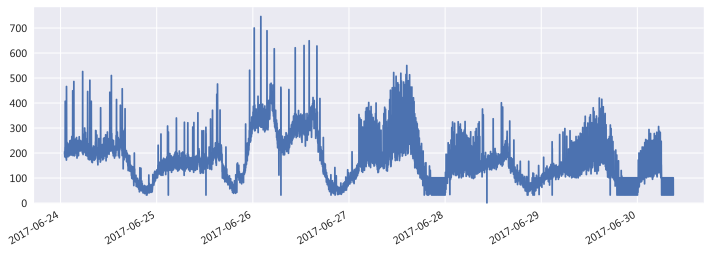

In [4]:
def plt_date(x, y):
    plt.figure(figsize=(12,4))
    plt.plot_date(mpl.dates.date2num(x), y, ls='-', marker=None)
    plt.ylim(ymin=0)
    plt.gcf().autofmt_xdate()
    plt.show()
x, y = zip(*map(lambda fn: [dt.datetime.utcnow().strptime(fn, RECORD_FILENAME), min(pd.read_csv(os.path.join(PATH, fn))['id'])], fs))
plt_date(x[:-1], np.subtract(y[1:], y[:-1]))

In [5]:
df = pd.concat(map(lambda fn: pd.read_csv(os.path.join(PATH, fn)), fs)).drop_duplicates().reset_index(drop=True)

In [6]:
# df = df[df['sname'] == 'ios服']
# df = df[df['star'] == 'SSR']

In [7]:
info = df.drop_duplicates('info')
i2c = info['info']
c2i = dict(zip(i2c, range(len(i2c))))
c2s = dict(info[['info', 'star']].values)
i2s = np.array(map(c2s.get, i2c))

In [8]:
for c in ['sname', 'star']:
    print 'Group by {}({})'.format(c, df.shape[0])
    for k, d in df.groupby(c):
        print '\t{:0=5.2f}%\t{:5}\t{}'.format(d.shape[0] / df.shape[0] * 100, d.shape[0], k)

Group by sname(437635)
	30.45%	133245	ios服
	64.78%	283487	安卓bili服
	04.78%	20903	安卓联运服
Group by star(437635)
	76.53%	334941	SR
	23.47%	102694	SSR


In [9]:
for c in ['star']:#, 'sname']:
    for k, d in df.groupby(c):
        print 'Group by {} = {}({})'.format(c, k, d.shape[0])
        d_ = dict(map(lambda (k, d): [k, d.shape[0]], d.groupby('info')))
        for k_ in sorted(d_, key=d_.get, reverse=True):
            print '\t{:0=5.2f}%\t{:5}\t{}'.format(d_[k_] / d.shape[0] * 100, d_[k_], k_)

Group by star = SR(334941)
	06.10%	20417	卡米拉
	06.06%	20282	齐格飞
	06.05%	20260	赫拉克勒斯
	06.05%	20253	玉藻猫
	06.04%	20242	玛尔达
	06.01%	20129	斯忒诺
	06.00%	20084	骑士迪昂
	05.99%	20050	伊丽莎白·巴托里
	05.98%	20045	卫宫
	05.98%	20041	玛丽·安托瓦内特
	03.50%	11712	罗摩
	03.48%	11663	兰斯洛特
	03.47%	11626	安妮·伯妮＆玛莉·瑞德
	03.43%	11483	弗兰肯斯坦
	03.43%	11474	卫宫〔Assassin〕
	03.41%	11424	阿塔兰忒
	03.40%	11375	阿斯托尔福
	03.38%	11328	芬恩·麦克库尔
	03.37%	11281	贝奥武夫
	03.35%	11234	童谣
	03.35%	11225	海伦娜·布拉瓦茨基
	00.81%	 2721	阿尔托莉雅·潘德拉贡〔Alter〕
	00.39%	 1290	尼禄·克劳狄乌斯
	00.37%	 1235	美狄亚〔Lily〕
	00.32%	 1061	李书文
	00.30%	 1006	托马斯·爱迪生
Group by star = SSR(102694)
	53.82%	55274	坂田金时
	03.57%	 3663	阿尔托莉雅·潘德拉贡
	03.45%	 3542	弗拉德三世
	03.44%	 3533	南丁格尔
	03.43%	 3520	开膛手杰克
	03.40%	 3487	俄里翁
	03.39%	 3486	阿蒂拉
	03.37%	 3459	弗朗西斯·德雷克
	03.36%	 3454	莫德雷德
	03.36%	 3452	诸葛孔明〔埃尔梅罗Ⅱ世〕
	03.35%	 3436	迦尔纳
	03.33%	 3424	阿周那
	03.30%	 3393	玉藻前
	03.28%	 3370	贞德
	00.76%	  782	尼古拉·特斯拉
	00.74%	  756	库·丘林[Alter]
	00.65%	  663	女王梅芙


In [10]:
UP_POOL_CARD = ['库·丘林[Alter]', '托马斯·爱迪生']
UP_POOL_CARD = ['坂田金时']
INIT_TEN_CARD = ['骑士迪昂', '玉藻猫', '玛尔达', '赫拉克勒斯', '伊丽莎白·巴托里',
                 '斯忒诺', '卡米拉', '玛丽·安托瓦内特', '卫宫', '齐格飞']
BASIC_POOL_CARD = INIT_TEN_CARD + ['阿塔兰忒', '安妮·伯妮＆玛莉·瑞德', '阿斯托尔福', '弗兰肯斯坦', '童谣',
                                   '贝奥武夫', '芬恩·麦克库尔', '兰斯洛特', '卫宫〔Assassin〕', '罗摩',
                                   '海伦娜·布拉瓦茨基',
                                   '南丁格尔', '弗朗西斯·德雷克', '俄里翁', '莫德雷德', '迦尔纳',
                                   '玉藻前', '贞德', '弗拉德三世', '阿尔托莉雅·潘德拉贡', '阿蒂拉',
                                   '阿周那', '诸葛孔明〔埃尔梅罗Ⅱ世〕', '开膛手杰克']
POOL_NAME, POOL_CARD = map(list, zip(*[['初始十连保底', INIT_TEN_CARD],
                                       ['初始十连非保底', filter(lambda c: c2s[c] == 'SR', BASIC_POOL_CARD)],
                                       ['UP池', BASIC_POOL_CARD + UP_POOL_CARD],
                                       ['-1章剧情池', BASIC_POOL_CARD]]))
for pn, pc in [['0~1章剧情池', ['阿尔托莉雅·潘德拉贡〔Alter〕']], ['2章剧情池', ['尼禄·克劳狄乌斯']],
               ['3章剧情池', ['美狄亚〔Lily〕']], ['4章剧情池', ['尼古拉·特斯拉', '阿尔托莉雅·潘德拉贡〔Alter〕']],
               ['5~章剧情池', ['库·丘林[Alter]', '女王梅芙', '托马斯·爱迪生', '李书文']]]:
    POOL_NAME.append(pn)
    POOL_CARD.append(POOL_CARD[-1] + pc)

In [11]:
i2pn = POOL_NAME
pn2i = dict(zip(i2pn, range(len(i2pn))))
i2pc = POOL_CARD
i2cnt = np.array(zip(*sorted(co.Counter(map(c2i.get, df['info'])).iteritems()))[1])

In [12]:
E = {'info': np.zeros(map(len, [i2pn, i2c]))}
for i in range(len(i2pn)):
    for c in i2pc[i]:
        E['info'][i, c2i[c]] += 1
E['SR'] = .65
E['SSR'] = .85
E['star'] = 2.2 / 1
E['init'] = np.array([1 / .167 , 1])

In [13]:
def e2a(e):
    alpha = e['info'].copy()
    for pn in i2pn:
        i = pn2i[pn]
        if 'UP' in pn:
            s2cnt = co.Counter(map(c2s.get, filter(lambda c: c not in UP_POOL_CARD, i2pc[i])))
            s2cnt_ = co.Counter(map(c2s.get, filter(lambda c: c in i2pc[i], UP_POOL_CARD)))
            for c in set(UP_POOL_CARD) & set(i2pc[i]):
                s = c2s[c]
                alpha[i, c2i[c]] = s2cnt[s] / (1 - e[s]) * e[s] / s2cnt_[s] * UP_POOL_CARD.count(c)
        if alpha[i, i2s == 'SSR'].sum():
            alpha[i, i2s == 'SSR'] *= alpha[i, i2s == 'SR'].sum() / e['star'] / alpha[i, i2s == 'SSR'].sum()
        alpha[i] /= alpha[i, alpha[i] != 0].min()
    return alpha
alpha = e2a(E)
beta = np.ones(alpha.shape[0])

prior = reduce(pd.merge, map(lambda pn: pd.DataFrame({'info': i2c, pn: alpha[pn2i[pn]] / alpha[pn2i[pn]].sum()}), i2pn))
pd.merge(prior, pd.DataFrame({'info': i2c, '实际出货': i2cnt / i2cnt.sum()}))

In [14]:
alpha *= 10
beta /= 10
E['init'] *= 10

In [15]:
%%time
def CGS(n, a, b, c):
    np.random.seed(0)
    thetas, pis = [], []
    da, db = map(np.zeros_like, [a, b])
    for _ in range(n):
        thetas.append(np.array(map(np.random.dirichlet, a + da)))
        
        b_ = b + db
        b_[pn2i['初始十连非保底']] = 0
        b_[pn2i['初始十连保底']] += db[pn2i['初始十连非保底']]
        pis.append(np.random.dirichlet(b_))
        pis[-1][map(pn2i.get, ['初始十连保底', '初始十连非保底'])] = np.random.dirichlet(
            E['init'] + db[map(pn2i.get, ['初始十连保底', '初始十连非保底'])]) * pis[-1][pn2i['初始十连保底']]
        
        da = (thetas[-1].T * pis[-1]).T
        da /= da.sum(axis=0)
        da *= c
        db = da.sum(axis=1)
    return thetas, pis
thetas, pis = CGS(100000, alpha, beta, i2cnt)

Wall time: 12.8 s


In [16]:
thetas, pis = thetas[-10000:], pis[-10000:]

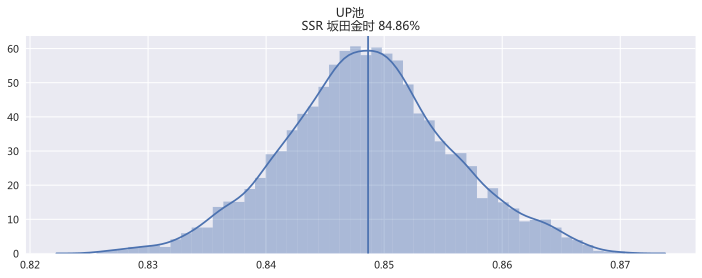

In [17]:
for pn in filter(lambda pn: 'UP' in pn, i2pn):
    plt.figure(figsize=(12, 4))
    plt.suptitle(unicode('{}'.format(pn), 'utf-8'))
    for c in set(UP_POOL_CARD) & set(i2pc[pn2i[pn]]):
        plt.subplot(1, len(UP_POOL_CARD), UP_POOL_CARD.index(c) + 1)
        ups = map(lambda t: t[pn2i[pn], c2i[c]] / t[pn2i[pn], i2s == c2s[c]].sum(), thetas)
        up = np.mean(ups)
        plt.title(unicode('{} {} {:.2f}%'.format(c2s[c], c, 100 * up), 'utf-8'))
        sb.distplot(ups)
        plt.axvline(up)
plt.show()

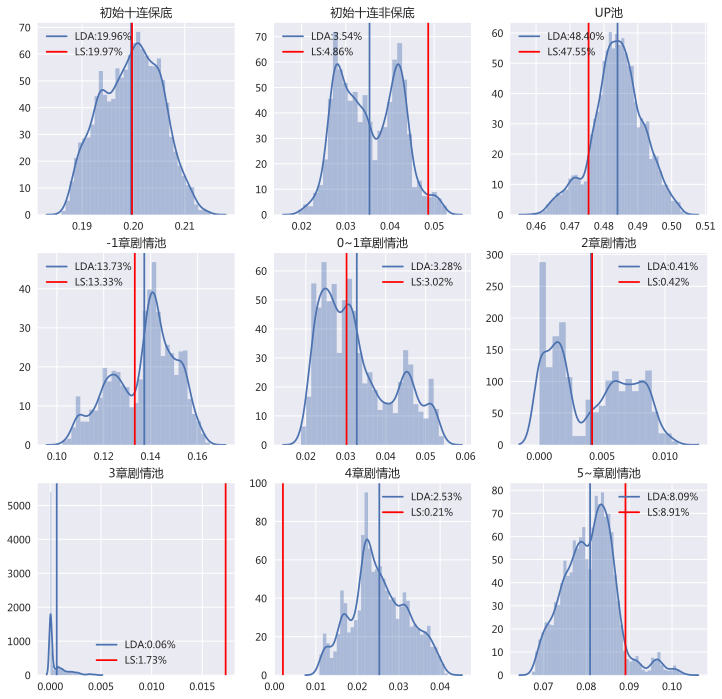

In [18]:
pi = {
    'LS': np.linalg.lstsq(alpha.T / alpha.sum(axis=1), i2cnt / i2cnt.sum())[0],
    'LDA': np.mean(pis, axis=0)
}
plt.figure(figsize=(12, np.ceil(len(i2pn) / 3) * 4))
for i in range(len(i2pn)):
    plt.subplot(np.ceil(len(i2pn) / 3), 3, i + 1)
    plt.title(unicode(i2pn[i], 'utf-8'))
    sb.distplot(map(op.itemgetter(i), pis))
    for k in pi:
        plt.axvline(pi[k][i], label='{}:{:.2f}%'.format(k, 100 * pi[k][i]), color='r' if k == 'LS' else None)
    plt.legend()
plt.show()

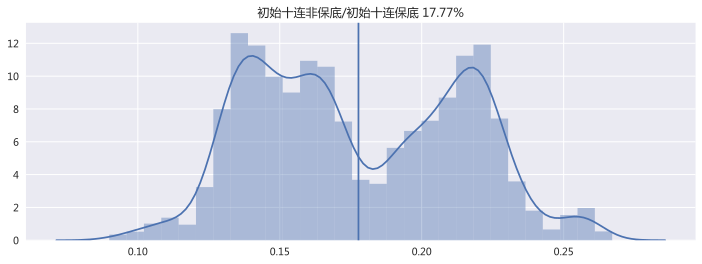

In [19]:
plt.figure(figsize=(12, 4))
inits = map(lambda pi: pi[pn2i['初始十连非保底']] / pi[pn2i['初始十连保底']], pis)
init = np.mean(inits)
plt.title(unicode('初始十连非保底/初始十连保底 {:.2f}%'.format(init * 100), 'utf-8'))
sb.distplot(inits)
plt.axvline(init)
plt.show()

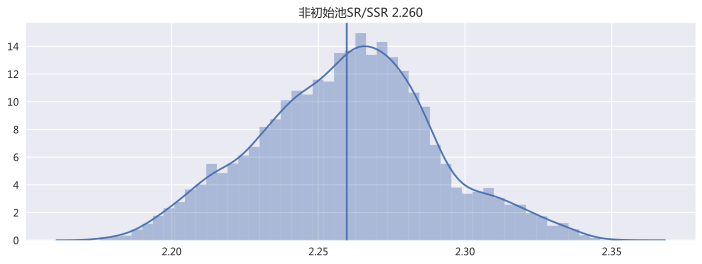

In [20]:
plt.figure(figsize=(12, 4))
stars = map(lambda (t, p): (t[:, i2s == 'SR'].sum(axis=1).dot(p) - p[map(pn2i.get, ['初始十连保底', '初始十连非保底'])].sum())
            / t[:, i2s == 'SSR'].sum(axis=1).dot(p), zip(thetas, pis))
star = np.mean(stars)
plt.title(unicode('非初始池SR/SSR {:.3f}'.format(star), 'utf-8'))
sb.distplot(stars)
plt.axvline(star)
plt.show()

theta = np.mean(thetas, axis=0)
posterior = reduce(pd.merge, map(lambda pn: pd.DataFrame({'info': i2c, pn: theta[pn2i[pn]]}), i2pn))
error = posterior.set_index('info') / prior.set_index('info') - 1
error[.05 < error.abs()]